# Tes `SORA` dengan data SAO 159063

In [1]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

SORA version: 0.2.1


In [2]:
df = pd.read_csv('sao-159063.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack
896,5396.0,[17:34:54.8913404],-13344.0,2107600.0,14234.52,983.5,-149,17504,362.0,251.0
897,5397.0,[17:34:54.9014401],-6075.0,2110592.0,14205.82,1053.91,-149,17248,362.0,251.0
898,5398.0,[17:34:54.9115398],-2152.0,2119104.0,14236.62,957.37,-149,17440,362.0,251.0
899,5399.0,[17:34:54.9216395],-8683.0,2111184.0,14227.3,1038.32,-149,18432,362.0,251.0
900,5400.0,[17:34:54.9317392],-18392.0,2108592.0,14275.06,1031.06,-149,17664,362.0,251.0


In [3]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack
896,5396.0,2022-07-31 17:34:54.891340,-13344.0,2107600.0,14234.52,983.5,-149,17504,362.0,251.0
897,5397.0,2022-07-31 17:34:54.901440,-6075.0,2110592.0,14205.82,1053.91,-149,17248,362.0,251.0
898,5398.0,2022-07-31 17:34:54.911539,-2152.0,2119104.0,14236.62,957.37,-149,17440,362.0,251.0
899,5399.0,2022-07-31 17:34:54.921639,-8683.0,2111184.0,14227.3,1038.32,-149,18432,362.0,251.0
900,5400.0,2022-07-31 17:34:54.931739,-18392.0,2108592.0,14275.06,1031.06,-149,17664,362.0,251.0


In [4]:
data = df[['FrameNum','timeInfo','signal-stack']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
896,5396.0,2022-07-31 17:34:54.891340,-13344.0
897,5397.0,2022-07-31 17:34:54.901440,-6075.0
898,5398.0,2022-07-31 17:34:54.911539,-2152.0
899,5399.0,2022-07-31 17:34:54.921639,-8683.0
900,5400.0,2022-07-31 17:34:54.931739,-18392.0


In [5]:
data_cp = data.copy()

data_cp['Value2'] = data_cp['Value'] + 20000
data_cp['JD'] = Time(data_cp['Time']).jd

data_cp['frac_JD'] = data_cp['JD'] - np.floor(data_cp['JD']).astype(int)
data_cp

,Frame,Time,Value,Value2,JD,frac_JD
0,4500.0,2022-07-31 17:34:45.842109,35885.0,55885.0,2459792.232475024,0.23247502418234944
1,4501.0,2022-07-31 17:34:45.852209,23481.0,43481.0,2459792.2324751415,0.23247514152899384
2,4502.0,2022-07-31 17:34:45.862308,38426.0,58426.0,2459792.2324752584,0.23247525840997696
3,4503.0,2022-07-31 17:34:45.872408,22565.0,42565.0,2459792.2324753753,0.23247537529096007
4,4504.0,2022-07-31 17:34:45.882507,41895.0,61895.0,2459792.232475492,0.2324754921719432
...,...,...,...,...,...,...
896,5396.0,2022-07-31 17:34:54.891340,-13344.0,6656.0,2459792.2325797607,0.2325797607190907
897,5397.0,2022-07-31 17:34:54.901440,-6075.0,13925.0,2459792.2325798776,0.23257987760007381
898,5398.0,2022-07-31 17:34:54.911539,-2152.0,17848.0,2459792.2325799945,0.23257999448105693
899,5399.0,2022-07-31 17:34:54.921639,-8683.0,11317.0,2459792.2325801114,0.23258011136204004


Text(0.5, 0, 'Frames')

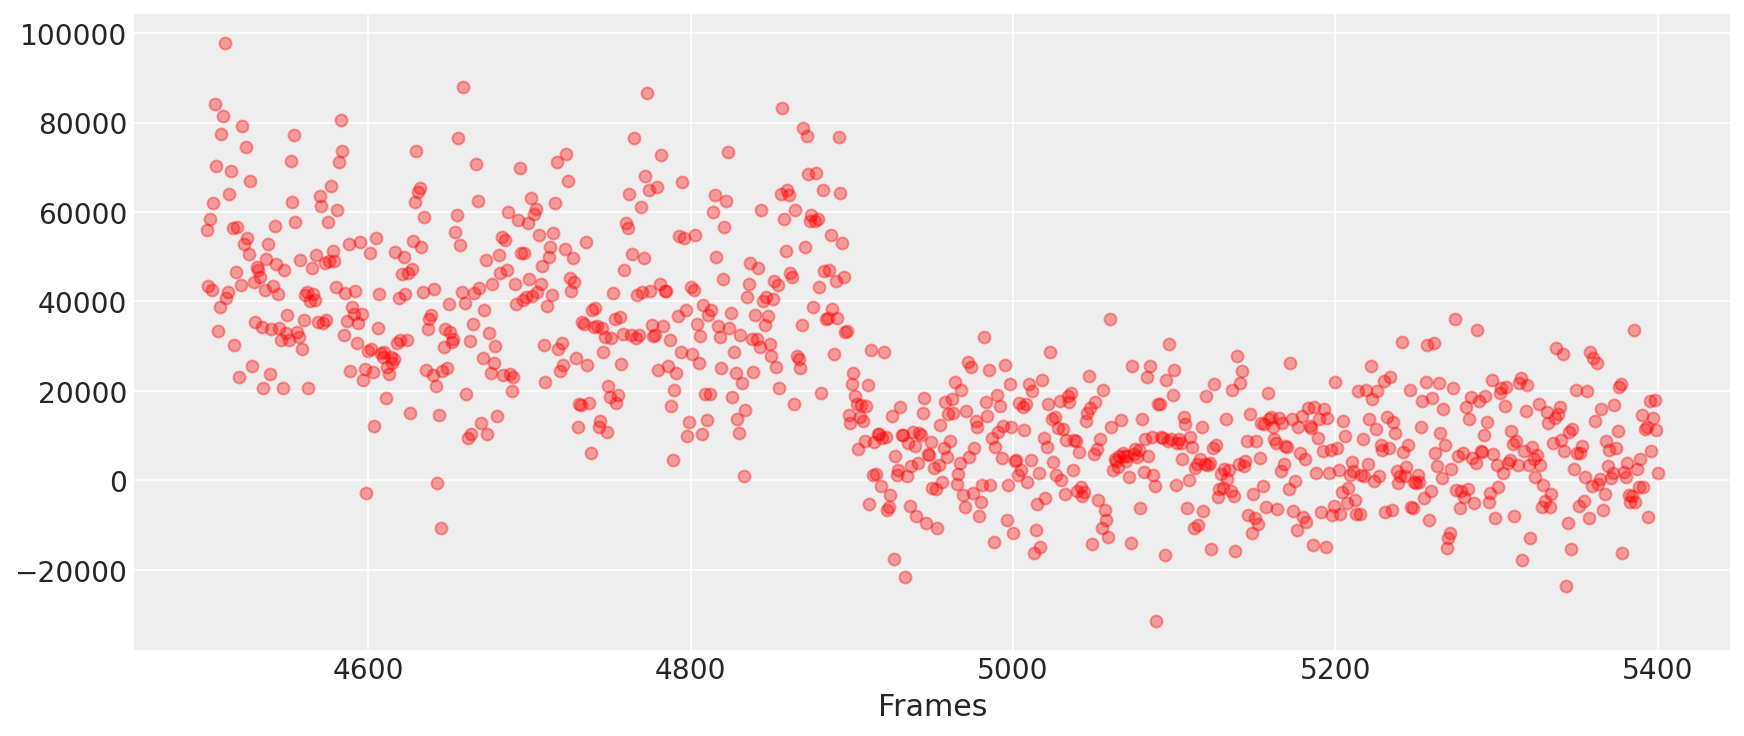

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data_cp['Frame'], data_cp['Value2'], 'ro', alpha=0.35)
# ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## Normalisasi data

In [7]:
data_cp['value_scaled'] = data_cp['Value2']/(data_cp['Value2'].std()*2)
# value_scaled = (data['Value'] - data['Value'].mean()) / data['Value'].std()

Text(0.5, 0, 'Julian Date')

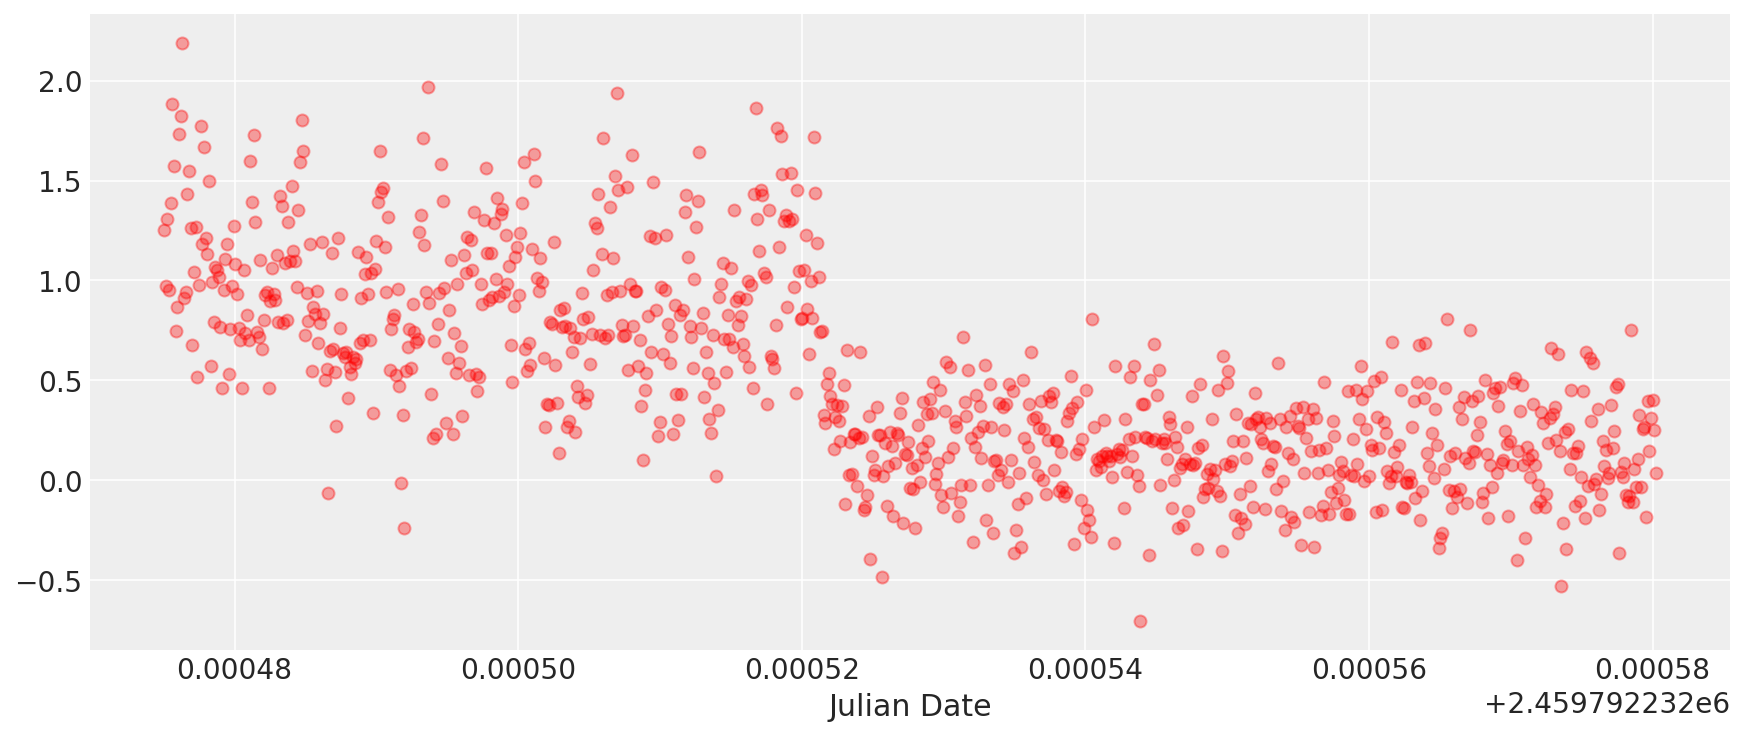

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
# fig, ax = plt.subplots()
# ax.plot(data['frac_JD'], value_scaled, 'ro', alpha=0.35)
ax.plot(data_cp['JD'], data_cp['value_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Julian Date')

## Tulis hasil normalisasi ke file `csv`

In [9]:
data_cp.to_csv('lc_sao159063.csv', header=False, columns=['JD', 'value_scaled'], index=False, sep='\t')

## Siapkan kurva cahaya observasi untuk `SORA`

In [10]:
lc = LightCurve(name='SAO 159063', file='lc_sao159063.csv', exptime=0.01)

print(lc)

Light curve name: SAO 159063
Initial time: 2022-07-31 17:34:45.842 UTC
End time:     2022-07-31 17:34:54.932 UTC
Duration:     0.151 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 901


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




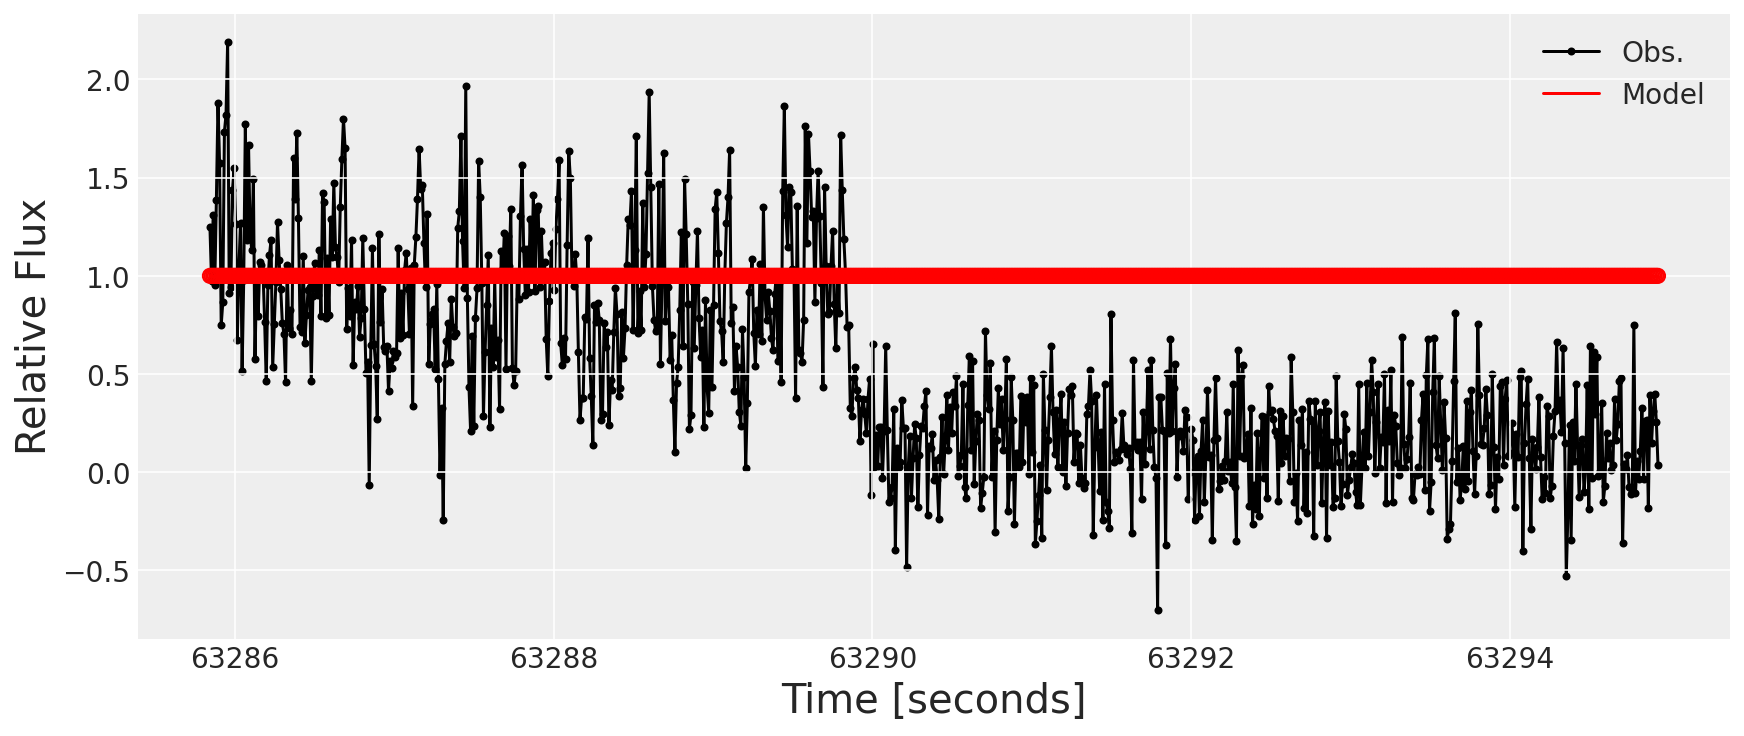

In [11]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(46628,46633)

{'rank': 1,
 'occultation_duration': 5.064406245946884,
 'central_time': 63292.389462813735,
 'immersion_time': 63289.85725969076,
 'emersion_time': 63294.92166593671,
 'time_err': 0.005049258470535278,
 'depth': 0.7731919720739683,
 'depth_err': 0.2459025767446116,
 'baseline': 0.9222318100308358,
 'baseline_err': 0.3940672793530493,
 'snr': 3.144302033390185,
 'occ_mask': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,

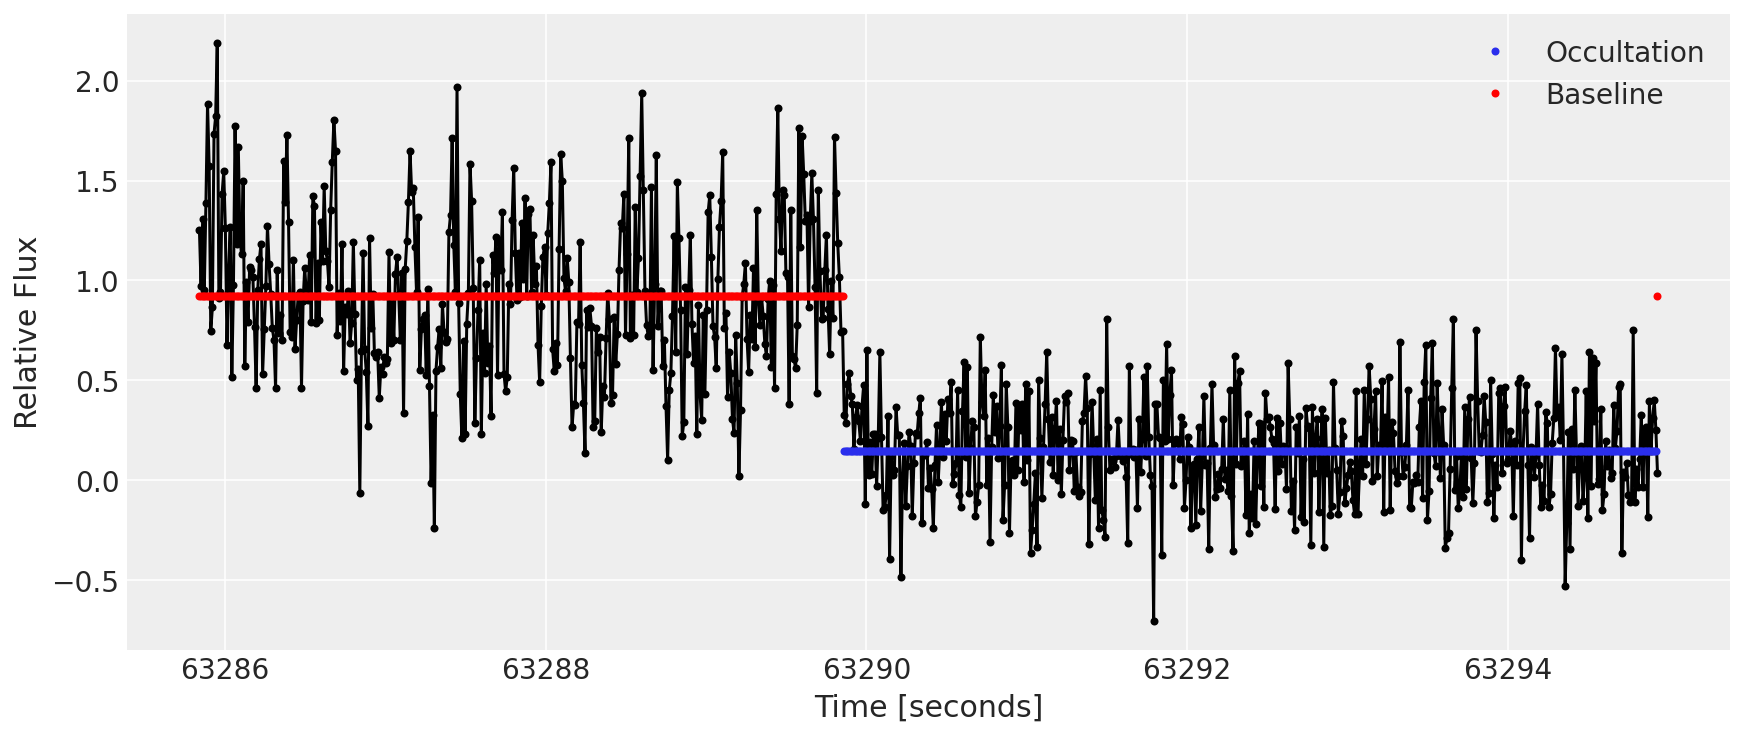

In [12]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

In [13]:
print('Exposure time:   {:.4f} s'.format(lc.exptime))
print('Cycle time:      {:.4f} s'.format(lc.cycle))

Exposure time:   0.0100 s
Cycle time:      0.0101 s


## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **9 Juli 2022 pukul 17:34:49.9 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [14]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 7, 9, 17, 34, 49.9)

In [15]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [16]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [17]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

15h 13m 07.17s
-17deg 56' 09.1"
0.002463510761242641


In [18]:
d_moon = distance.au
d_moon

0.002463510761242641

In [19]:
lc.set_dist(dist=d_moon)

lc.dist

0.002463510761242641

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [20]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [21]:
lc.fresnel_scale

0.010025106954746798

In [22]:
from sora import Star
from sora.star import kervella, van_belle

In [23]:
star = Star(coord='15 10 11.4022346400 -18 03 25.511866200')

c:\Anaconda3\envs\work_pymc\lib\site-packages\sora\star\core.py:338: UserWarning: This star was indicated as an source with duplicate sources Please be aware that its positions must be handled with care.
  warnings.warn('This star was indicated as an source with duplicate sources '+


1 Gaia-EDR3 star found G=7.599621
star coordinate at J2016.0: RA=15h10m11.38557s +/- 0.0214 mas, DEC=-18d03m25.7859s +/- 0.0169 mas



In [24]:
star.mag

{'G': 7.599621,
 'B': 9.352999687194824,
 'V': 8.027999877929688,
 'R': 7.210000038146973,
 'J': 5.724999904632568,
 'H': 5.138999938964844,
 'K': 4.90500020980835}

In [25]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-07-09 17:34:49.9', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

15h10m11.3786206052s -18d03m25.8969157436s


In [26]:
star.error_at(time='2022-07-09 17:34:49.9')

(<Quantity 0.16810983 mas>, <Quantity 0.14407932 mas>)

In [27]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.00105643 km>

In [28]:
diameter.value

0.0010564310945742786

In [29]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s.

In [30]:
distance.km

368535.96432843513

In [31]:
# from astropy.coordinates import Angle
# ang_vel = 0.55*u.arcsec # dalam arcsec/s

# lin_vel = distance.km * np.tan(ang_vel)

kms = u.km/u.s

lin_vel = 0.8776*kms

lin_vel

<Quantity 0.8776 km / s>

In [32]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 5.064406245946884,
 'central_time': 63292.389462813735,
 'immersion_time': 63289.85725969076,
 'emersion_time': 63294.92166593671,
 'time_err': 0.005049258470535278,
 'depth': 0.7731919720739683,
 'depth_err': 0.2459025767446116,
 'baseline': 0.9222318100308358,
 'baseline_err': 0.3940672793530493,
 'snr': 3.144302033390185,
 'occ_mask': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,

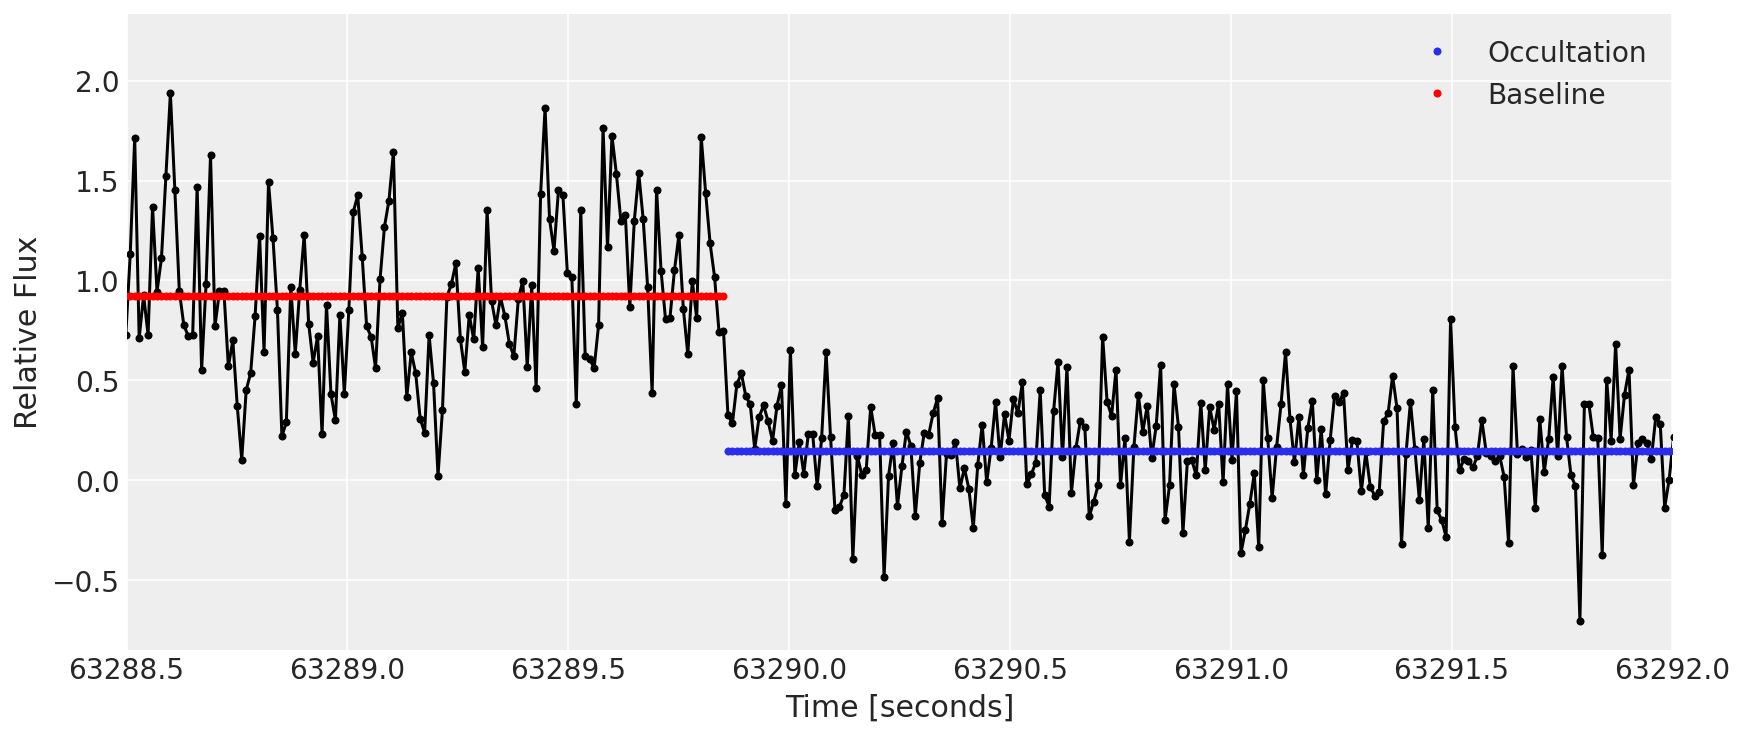

In [33]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)
plt.xlim(63288.5, 63292)
tes2

**Parameter untuk model**

In [34]:
immersion_time = 63289.857  # seconds relative to tref
emersion_time  = 63296.000  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 2 # seconds relative to tref
tmax = emersion_time   + 2 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

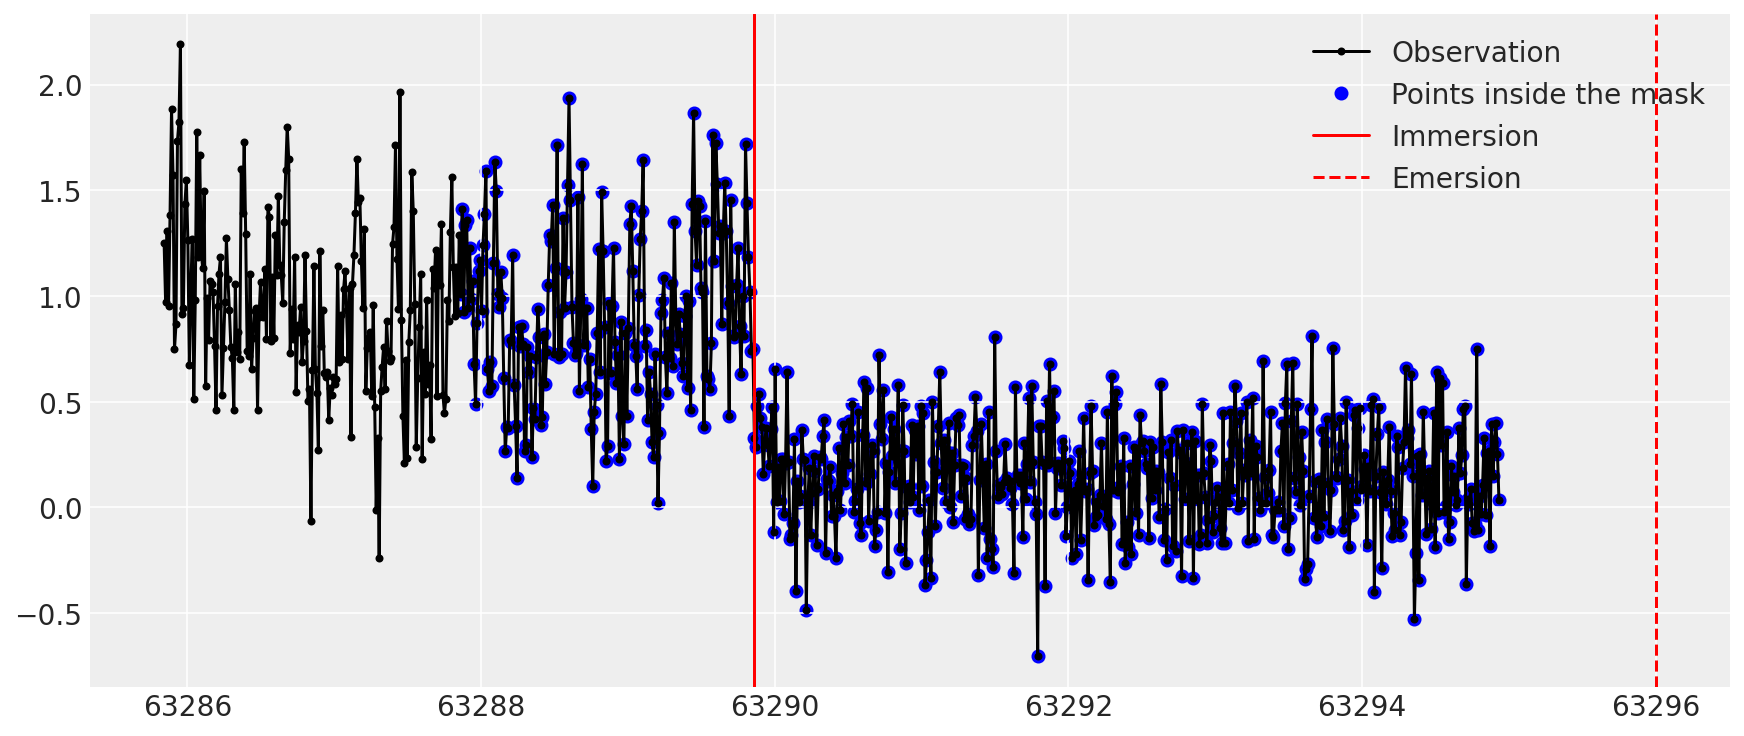

In [35]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()
# plt.show()

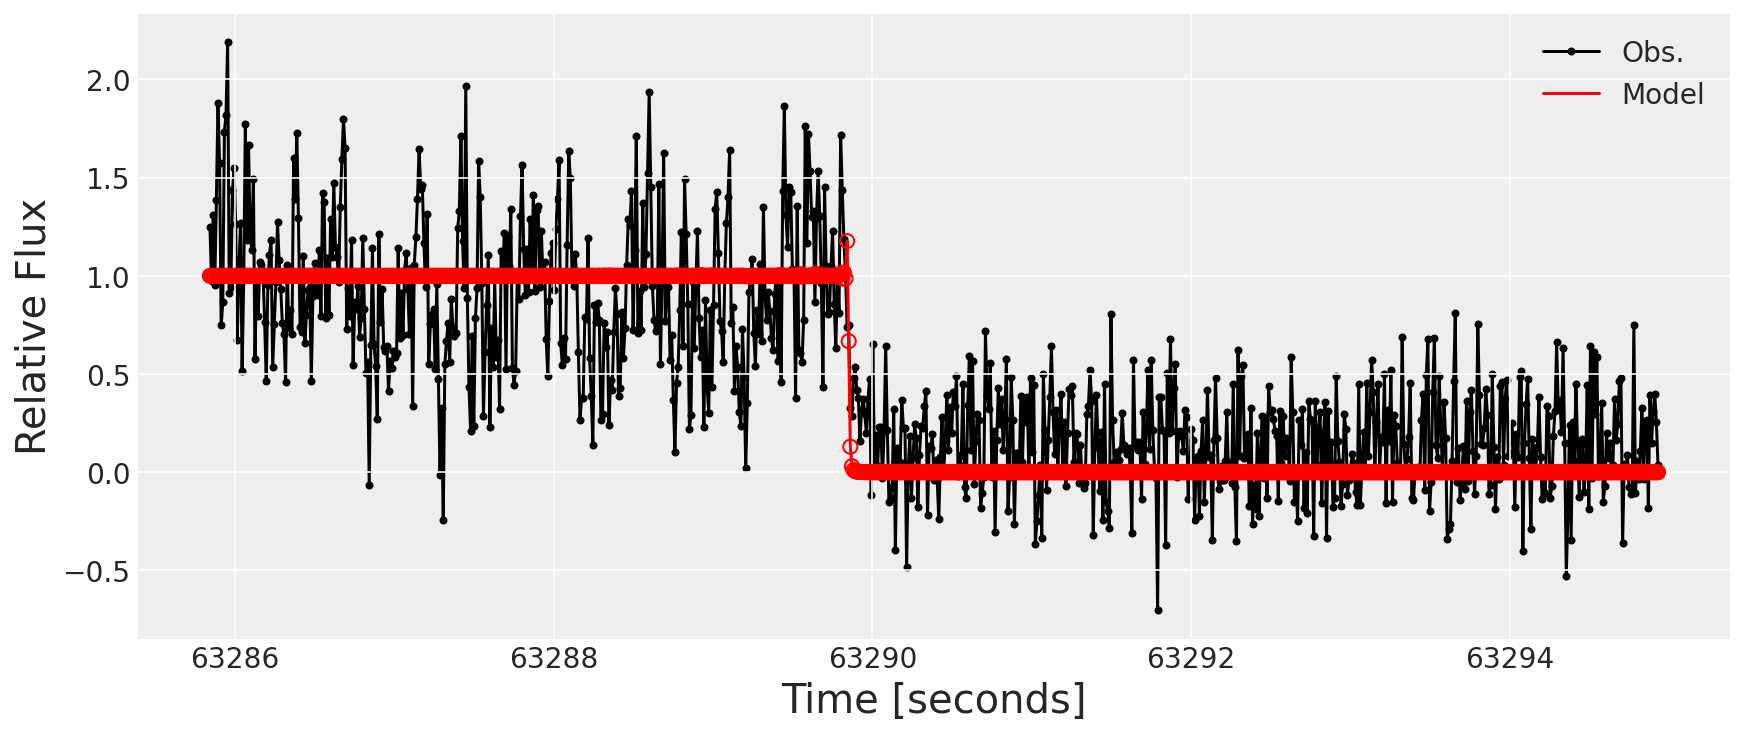

In [36]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
# plt.xlim(61789,61793)


In [37]:
lc_chi2 = lc.occ_lcfit(loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [38]:
print(lc_chi2)

Minimum chi-square: 606.490
Number of fitted points: 901
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.675

immersion:
    1-sigma: 63289.856 +/- 0.010
    3-sigma: 63289.857 +/- 0.025

emersion:
    1-sigma: 63294.939 +/- 0.008
    3-sigma: 63294.927 +/- 0.020



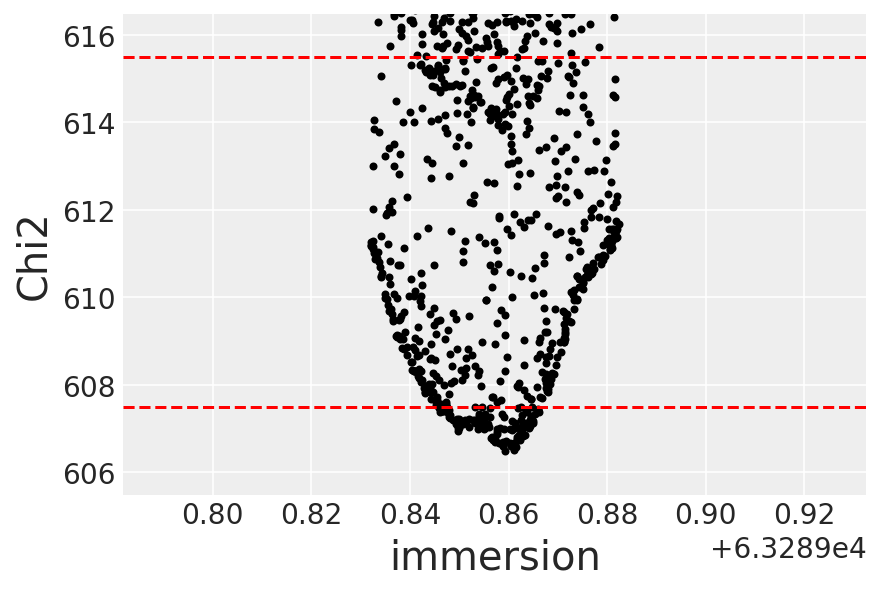

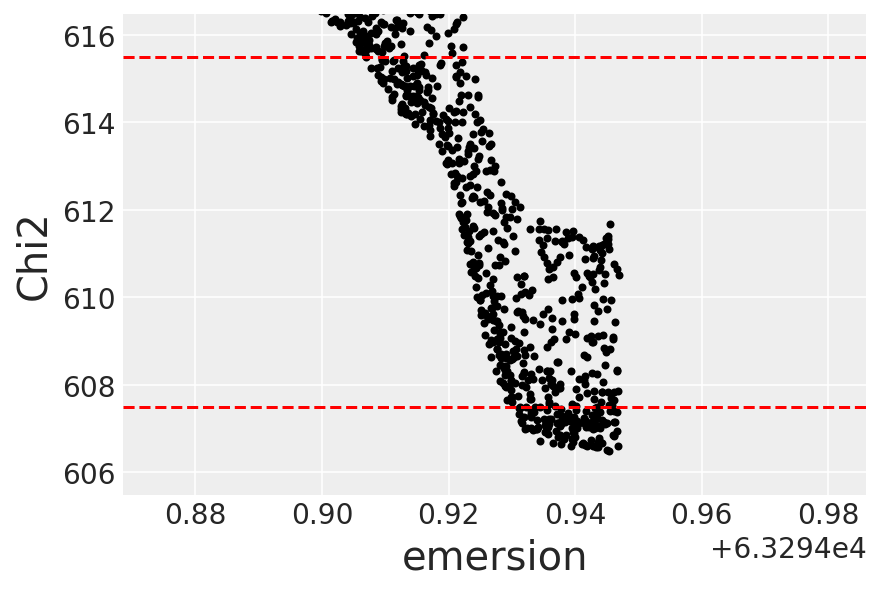

In [39]:
lc_chi2.plot_chi2()

Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

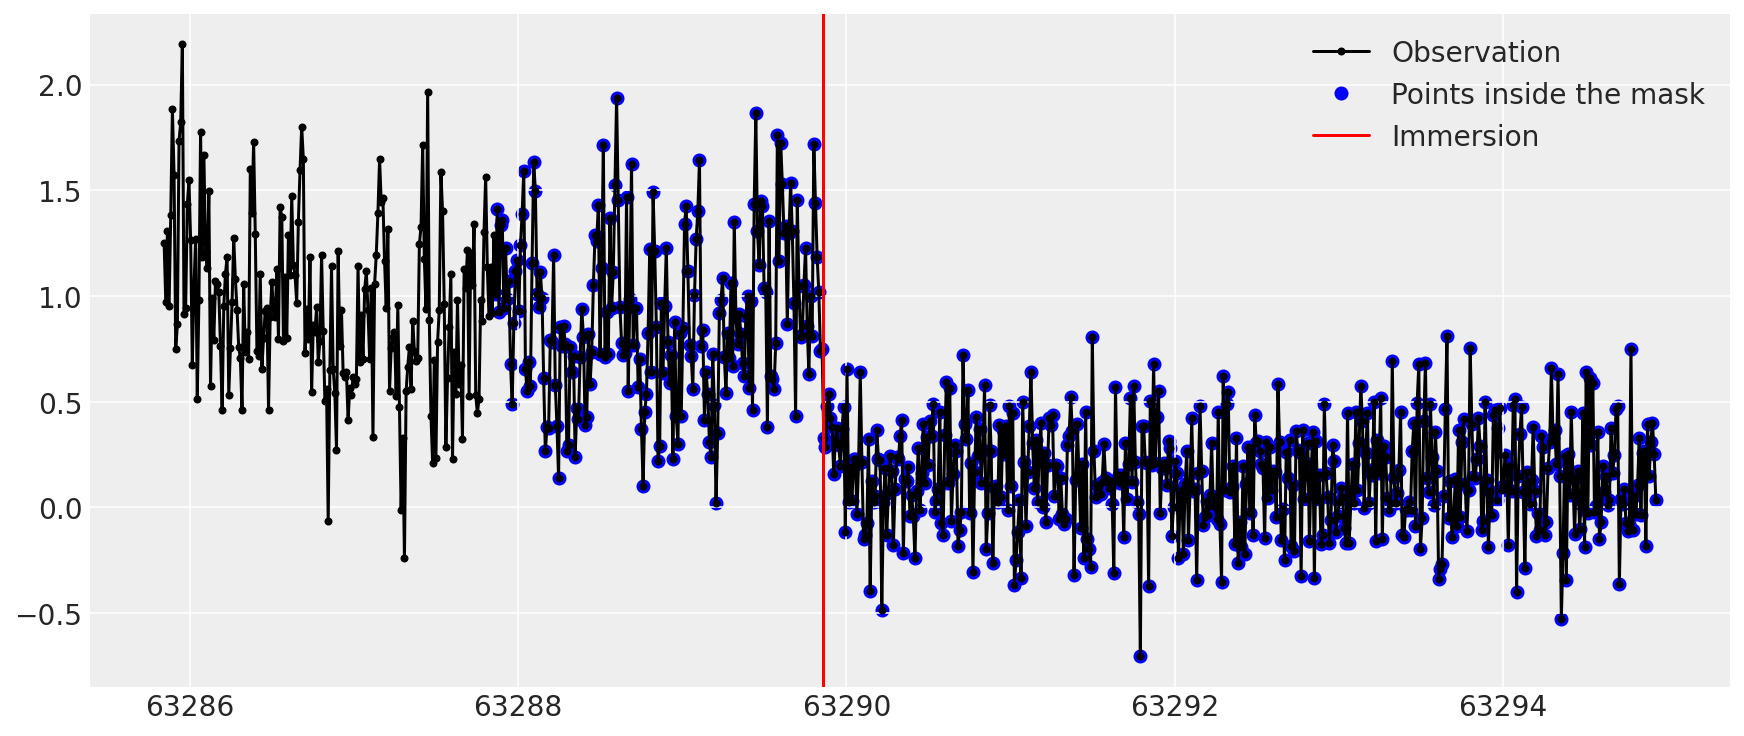

In [40]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [41]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [42]:
print(lc_chi2_imm)

Minimum chi-square: 417.191
Number of fitted points: 701
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.596

immersion:
    1-sigma: 63289.857 +/- 0.009
    3-sigma: 63289.857 +/- 0.020



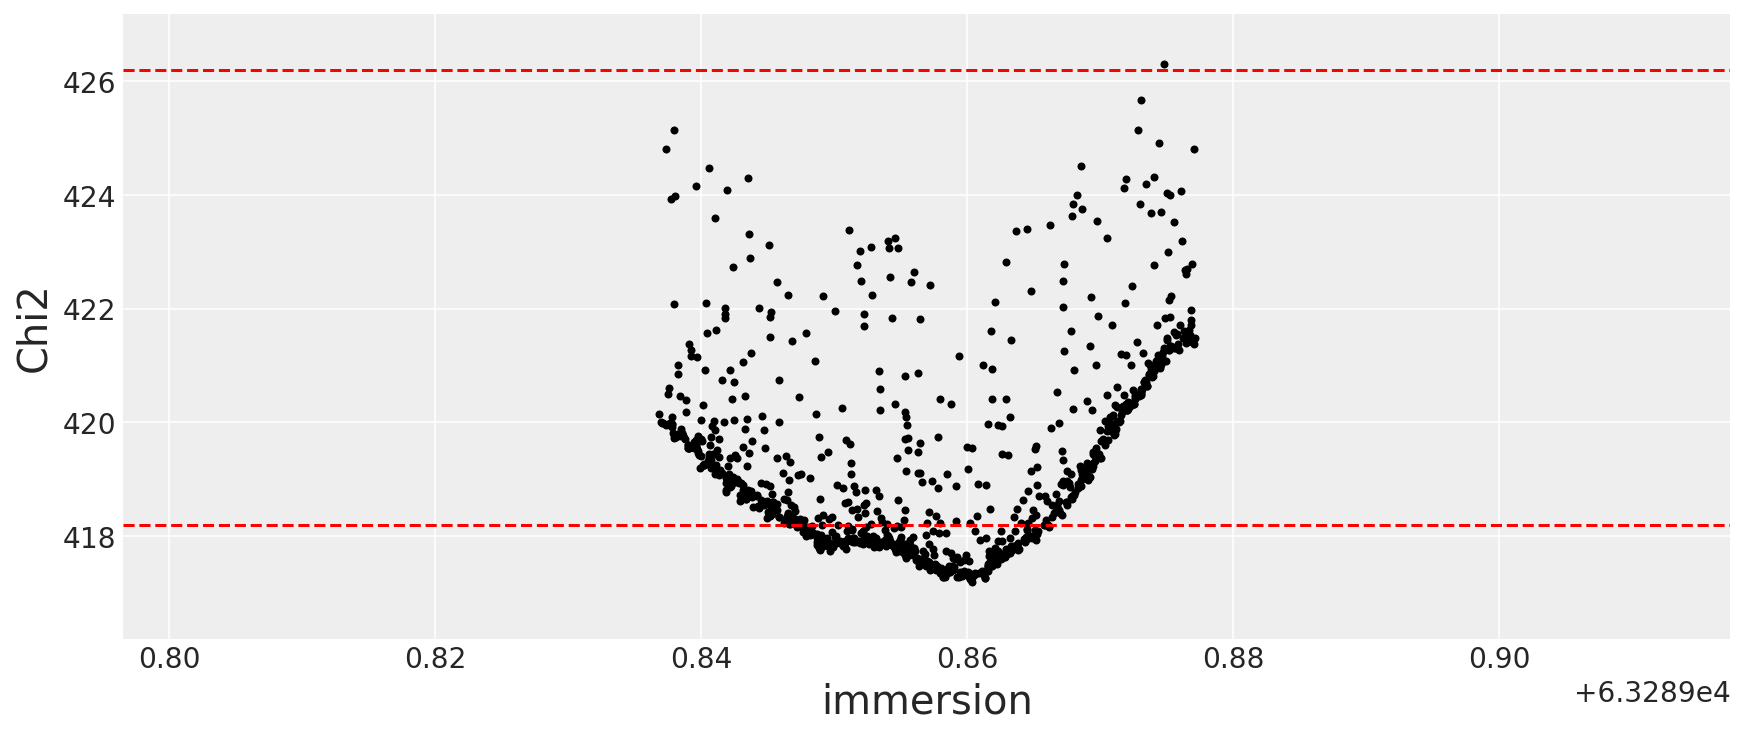

In [43]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [44]:
print(lc)

Light curve name: SAO 159063
Initial time: 2022-07-31 17:34:45.842 UTC
End time:     2022-07-31 17:34:54.932 UTC
Duration:     0.151 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 901

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.878 km/s
Fresnel scale:        0.011 seconds or 0.01 km
Stellar size effect:  0.001 seconds or 0.00 km
Inst. response:       0.010 seconds or 0.01 km
Dead time effect:     0.000 seconds or 0.00 km
Model resolution:     0.001 seconds or 0.00 km
Modelled baseflux:    0.922
Modelled bottomflux:  0.227
Light curve sigma:    0.389

Immersion time: 2022-07-31 17:34:49.857 UTC +/- 0.009 seconds
Emersion time:  2022-07-31 17:34:54.939 UTC +/- 0.008 seconds

Monte Carlo chi square fit.

Minimum chi-square: 417.191
Number of fitted points: 701
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.596

immersion:
    1-sigm

(63289.0, 63291.0)

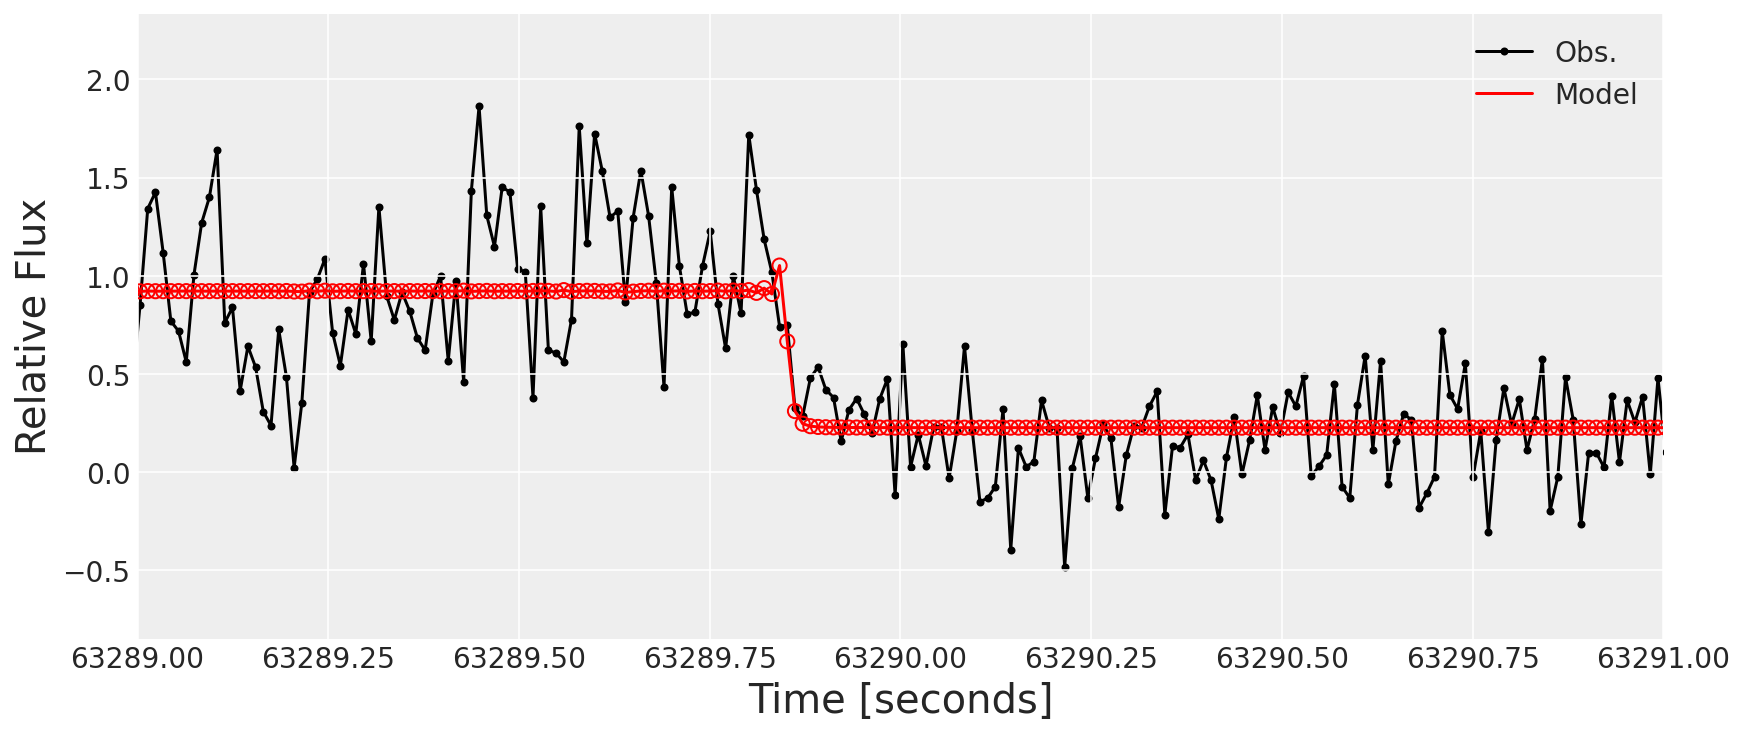

In [45]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(63289.0, 63291)

(-0.3, 2.0)

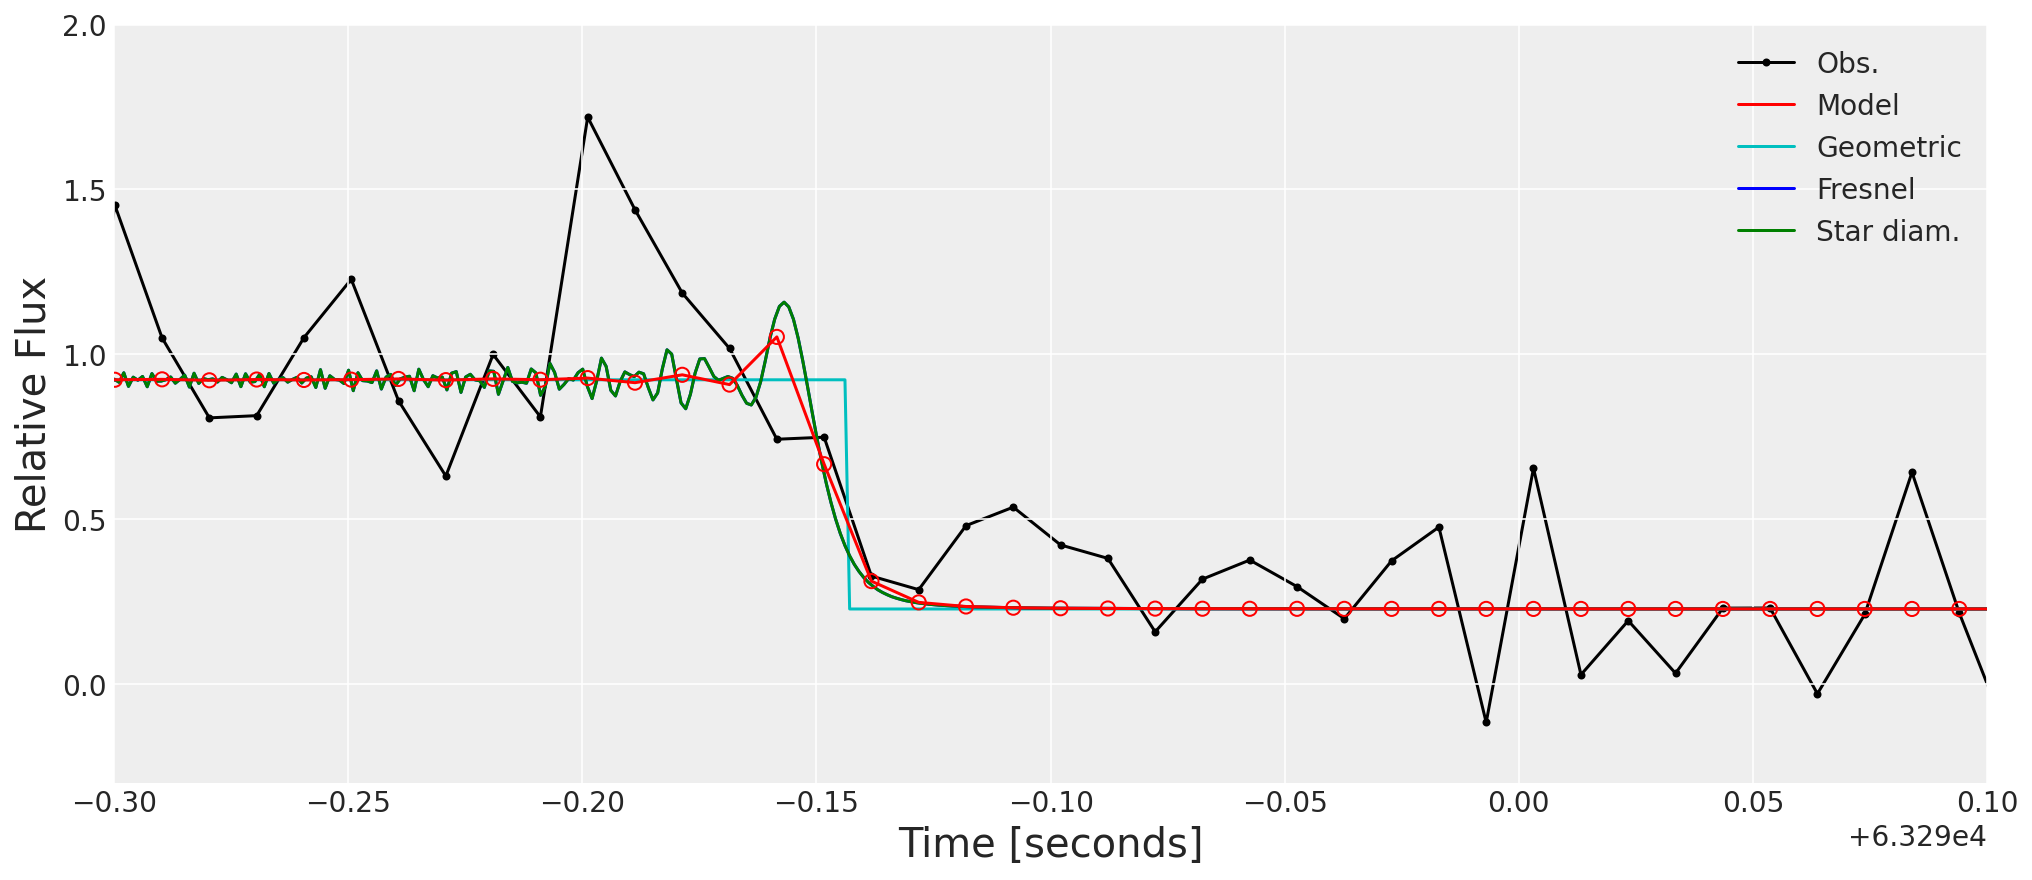

In [46]:
from matplotlib.markers import MarkerStyle


plt.figure(figsize=(14,6))
# plt.rcParams['lines.linewidth'] = 1
# plt.rcParams['lines.markersize'] = 15
# plt.rc('lines', markersize=3)

lc.plot_lc()
lc.plot_model()


plt.xlim(63289.7,63290.1)
plt.ylim(-0.3, 2.0)

In [47]:
lc.immersion

<Time object: scale='utc' format='iso' value=2022-07-31 17:34:49.857>